<a href="https://colab.research.google.com/github/shubham62025865/shubham1/blob/main/Classification_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Metrics

<img width = 700 src = https://cdn-images-1.medium.com/max/800/0*cn1x03pxWzyKce-7.jpg />

Let's take a very simple example of cancer predicting model

it outputs 1 if a person having cancer and outputs 0 if a person is not having cancer

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
y_test = [0,0,1,0,1,1,0,0,1,1]
y_pred = [0,1,1,0,0,1,0,1,1,1]

In [ ]:
def confusion(y_test, y_pred):

    sns.set_theme(style="whitegrid")
    plt.rcParams["figure.figsize"] = [7, 4]
    plt.rcParams["figure.autolayout"] = True
    data = confusion_matrix(y_test,y_pred)
    df_cm = pd.DataFrame(data)
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    cm = sns.heatmap(df_cm,annot=True)
    cm.plot()

In [ ]:
data = confusion_matrix(y_test, y_pred)
data

array([[3, 2],
       [1, 4]])

In [ ]:
temp_df = pd.DataFrame(data)
temp_df.index.name = "Actual"
temp_df.columns.name = "Predicted"
temp_df

Predicted,0,1
Actual,,
0,3,2
1,1,4


<Axes: xlabel='Predicted', ylabel='Actual'>

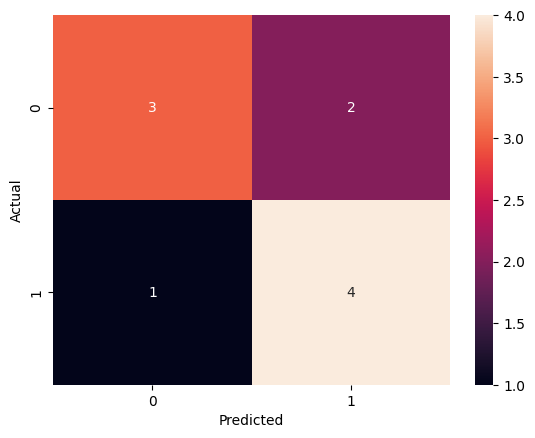

In [ ]:
sns.heatmap(temp_df, annot=True)

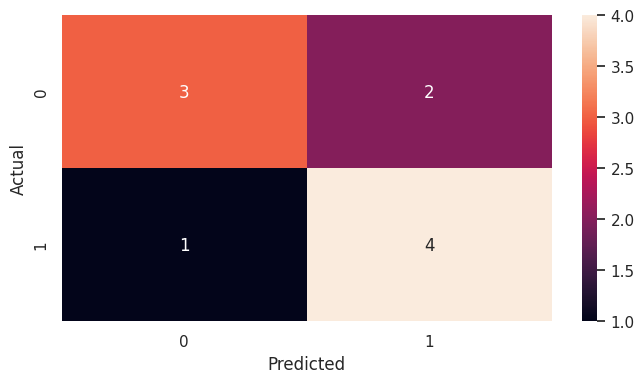

In [ ]:
confusion(y_test, y_pred)

<img width = 500 src = https://miro.medium.com/max/1218/1*jMs1RmSwnYgR9CsBw-z1dw.png />

In [ ]:
df = pd.DataFrame({"y_test": y_test, "y_pred":y_pred})
df

,y_test,y_pred
0,0,0
1,0,1
2,1,1
3,0,0
4,1,0
5,1,1
6,0,0
7,0,1
8,1,1
9,1,1


classification metrics - https://scikit-learn.org/stable/modules/model_evaluation.html

## Accuracy - 

From all classes how many of them we predicted correctly

***Formula = (Number of correct predictions)/ (Total predictions)***

<img width = 400 src = https://miro.medium.com/max/1218/1*jMs1RmSwnYgR9CsBw-z1dw.png />


**Accuracy = (TP + TN)/ (TP + TN + FP + FN)**

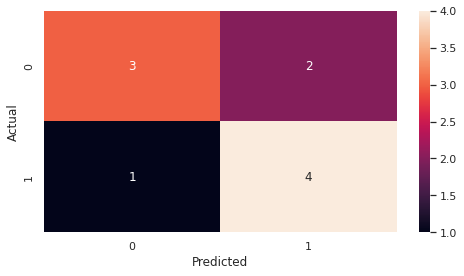

In [ ]:
confusion(y_test, y_pred)

In [ ]:
(3+4)/(3+4+2+1)

0.7

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7

## Recall - 
From all the actual positive classes, how many we predicted correctly

**Recall = TP/(TP + FN)**

***Recall is also known as Sensitivity and True Positive Rate***

<img width = 400 src = https://miro.medium.com/max/1218/1*jMs1RmSwnYgR9CsBw-z1dw.png />

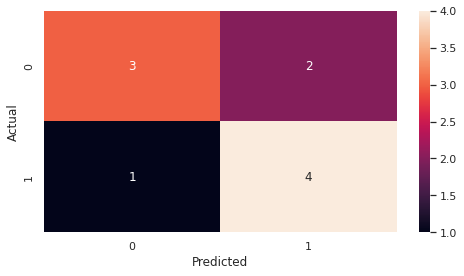

In [ ]:
confusion(y_test,y_pred)

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.8

## Precision - 
From all the classes that we have predicted positive how many are actually positive.

**Precision = TP/(TP + FP)**


<img width = 400 src = https://miro.medium.com/max/1218/1*jMs1RmSwnYgR9CsBw-z1dw.png />

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.6666666666666666

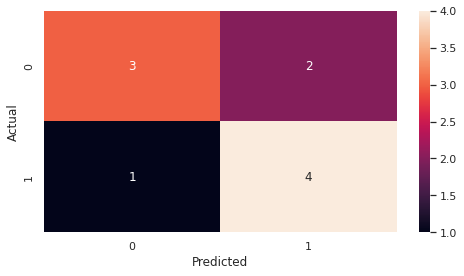

In [ ]:
confusion(y_test,y_pred)

## Misclassification Rate
Overall how often model is wrong

**Misclassification Rate = (FP + FN)/(TP + TN + FP + FN)**

***Note - it is equivalent to (1 - Accuracy), also known as Error rate.*** 

## False Positive Rate

When it is actually 0, how often our model predict it as 1

**FPR = FP/(FP+TN)**

<img width = 400 src = https://miro.medium.com/max/1218/1*jMs1RmSwnYgR9CsBw-z1dw.png />

In [ ]:
confusion_matrix(y_test,y_pred)

array([[3, 2],
       [1, 4]])

In [ ]:
temp = pd.DataFrame(confusion_matrix(y_test,y_pred))

In [ ]:
temp

,0,1
0,3,2
1,1,4


In [ ]:
temp.iloc[0,1]

2

In [ ]:
temp.iloc[0].sum()

5

In [ ]:
def FPR(y_test, y_pred):

  """
  Takes input as y_test, y_pred
  Returns False Positive Rate (FP/(FP+TN))
  """
  data = confusion_matrix(y_test,y_pred)
  cm_df = pd.DataFrame(data)
  fp = cm_df.iloc[0,1]
  fp_plus_tn = cm_df.iloc[0].sum()
  
  return (fp/fp_plus_tn)

In [ ]:
FPR(y_test,y_pred)

0.4

## True Negative Rate

When it is actually 0, how often our model predict it as 0.

**TNR = TN / (FP + TN)**

***Note - TNR = (1-FPR) also known as specificity***

In [ ]:
1 - FPR(y_test,y_pred)

0.6

## Null Error Rate

If you only predict majority class how often you would be wrong. This can be a useful baseline metric to compare your classifier. 

Exercise - https://developers.google.com/machine-learning/crash-course/classification/check-your-understanding-accuracy-precision-recall

## F1 Score

**F1 Score = 2 x ( (precision x recall) / (precision + recall) )**

It is also called the F Score or the F Measure. Put another way, the F1 score conveys the balance between the precision and the recall.

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test,y_pred)

NameError: ignored

## Classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.67      0.80      0.73         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10



## ROC curve

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. 

This curve plots two parameters:

- True Positive Rate
- False Positive Rate

True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows:

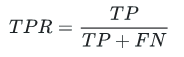


False Positive Rate (FPR) is defined as follows:

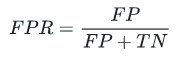

<img width = 400 src = https://miro.medium.com/max/1218/1*jMs1RmSwnYgR9CsBw-z1dw.png />

An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.

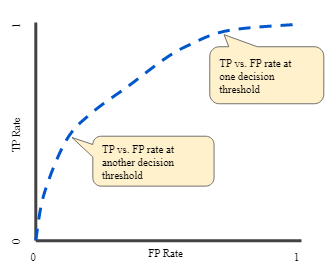

## What is the AUC-ROC curve?

The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.


  <img width = 300 src = https://cdn.analyticsvidhya.com/wp-content/uploads/2020/06/AUC1.png />



When AUC = 1, then the classifier is able to perfectly distinguish between all the Positive and the Negative class points correctly. If, however, the AUC had been 0, then the classifier would be predicting all Negatives as Positives, and all Positives as Negatives.

<img width = 300 src = https://cdn.analyticsvidhya.com/wp-content/uploads/2020/06/AUC3.png />


When 0.5<AUC<1,

there is a high chance that the classifier will be able to distinguish the positive class values from the negative class values. This is so because the classifier is able to detect more numbers of True positives and True negatives than False negatives and False positives.

<img width = 300 src = https://cdn.analyticsvidhya.com/wp-content/uploads/2020/06/AUC2.png />

When AUC=0.5, then the classifier is not able to distinguish between Positive and Negative class points. Meaning either the classifier is predicting random class or constant class for all the data points.

***So, the higher the AUC value for a classifier, the better its ability to distinguish between positive and negative classes.***

## How Does the AUC-ROC Curve Work?

In a ROC curve, a higher X-axis value indicates a higher number of False positives than True negatives. While a higher Y-axis value indicates a higher number of True positives than False negatives. So, the choice of the threshold depends on the ability to balance between False positives and False negatives.

Let’s dig a bit deeper and understand how our ROC curve would look like for different threshold values and how the specificity and sensitivity would vary.


<img width = 350 src = https://cdn.analyticsvidhya.com/wp-content/uploads/2020/06/AUC-ROC-curve.png />





In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

Dataset - https://www.kaggle.com/datasets/jahnveenarang/cvdcvd-vd

In [ ]:
df = pd.read_csv("/content/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.drop(columns = ["User ID"], inplace = True)
df["Gender"] = df.Gender.replace({"Female": 1, "Male" :0})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


In [ ]:
X = df.drop(columns = ["Purchased"])
y = df["Purchased"]

In [ ]:
from sklearn.model_selection import train_test_split
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24)

print(f'Shape of X_train -: {X_train.shape}')
print(f'Shape of X_test -: {X_test.shape}')
print(f'Shape of y_train -: {y_train.shape}')
print(f'Shape of y_test -: {y_test.shape}')

Shape of X_train -: (320, 3)
Shape of X_test -: (80, 3)
Shape of y_train -: (320,)
Shape of y_test -: (80,)


In [ ]:
# Scalling data

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# logistic regression
model1 = LogisticRegression()

# Random forest classifier
model2 = RandomForestClassifier()

In [ ]:
# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
model1.predict_proba(X_test)

In [ ]:
# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

## Computing ROC-AUC

In [ ]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.9629120879120879 0.9783653846153846


Sklearn has a very potent method roc_curve() which computes the ROC for your classifier in a matter of seconds! It returns the FPR, TPR, and threshold values:

In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

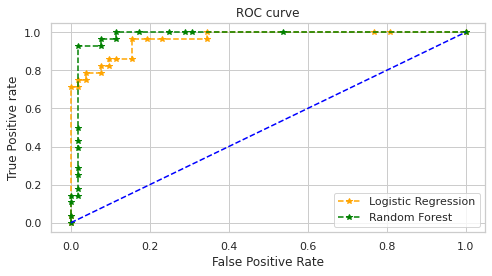

In [ ]:
# plot roc curves
plt.plot(fpr1, tpr1,marker = '*', linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2,marker = '*', linestyle='--',color='green', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
# plt.savefig('ROC',dpi=300)
plt.show()

It is evident from the plot that the AUC for the Logistic Regression ROC curve is lower than that for the Random Forest classifier ROC curve. Therefore, we can say that Random Forest classifier did a better job of classifying the positive class in the dataset.

## How to select optimal Threshold value for our model ?

The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

G-Mean = sqrt(Sensitivity * Specificity)

In [ ]:
gmeans1 = np.sqrt(tpr1 * (1-fpr1))
gmeans2 = np.sqrt(tpr2 * (1-fpr2))

In [ ]:
tpr1

array([0.        , 0.03571429, 0.71428571, 0.71428571, 0.75      ,
       0.75      , 0.78571429, 0.78571429, 0.82142857, 0.82142857,
       0.85714286, 0.85714286, 0.85714286, 0.96428571, 0.96428571,
       0.96428571, 0.96428571, 1.        , 1.        , 1.        ,
       1.        ])

In [ ]:
thresh1

array([1.99595921e+00, 9.95959212e-01, 5.64207555e-01, 5.52194133e-01,
       5.32724341e-01, 5.29352570e-01, 5.00341910e-01, 4.72626364e-01,
       4.46126833e-01, 4.13985094e-01, 3.96758867e-01, 3.67678897e-01,
       3.62698424e-01, 3.51224668e-01, 3.06226367e-01, 2.93737821e-01,
       2.34523489e-01, 2.25412668e-01, 1.70090630e-02, 1.36537711e-02,
       1.84121601e-03])

In [ ]:
gmeans1

array([0.        , 0.18898224, 0.84515425, 0.83698832, 0.85765781,
       0.84920778, 0.86919187, 0.85163063, 0.87077078, 0.86165251,
       0.8801848 , 0.87077078, 0.85163063, 0.90329069, 0.88252261,
       0.86125388, 0.79403684, 0.80860754, 0.48038446, 0.43852901,
       0.        ])

In [ ]:
np.argmax(gmeans1)

13

In [ ]:
ix1 = np.argmax(gmeans1)
ix2 = np.argmax(gmeans2)

In [ ]:
thresh1[ix1]

0.35122466777570754

In [ ]:
print('For model1 Best Threshold=%f, G-Mean=%.3f' % (thresh1[ix1], gmeans1[ix1]))

For model1 Best Threshold=0.351225, G-Mean=0.903


In [ ]:
print('For model2 Best Threshold=%f, G-Mean=%.3f' % (thresh2[ix2], gmeans2[ix2]))

For model2 Best Threshold=0.430000, G-Mean=0.954


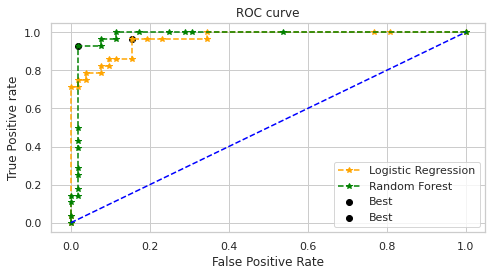

In [ ]:
# plot roc curves
plt.plot(fpr1, tpr1,marker = '*', linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2,marker = '*', linestyle='--',color='green', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.scatter(fpr1[ix1], tpr1[ix1], marker='o', color='black', label='Best')
plt.scatter(fpr2[ix2], tpr2[ix2], marker='o', color='black', label='Best')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')

plt.show()

based on above threshold values let's create confusion metrics for both models

In [ ]:
def custom_predict(model,X_test, threshold):
    probs = model.predict_proba(X_test)
    return (probs[:, 1] > threshold).astype(int)

In [ ]:
int(0.4 < 0.5)

1

In [ ]:
y_pred_1 = custom_predict(model1, X_test, 0.351225)
y_pred_2 = custom_predict(model2, X_test, 0.348333)

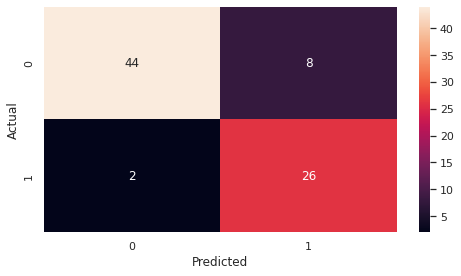

In [ ]:
confusion(y_test,y_pred_1)

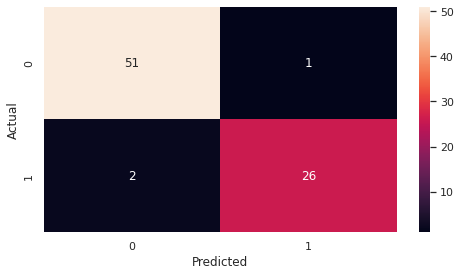

In [ ]:
confusion(y_test,y_pred_2)

In [ ]:
y_pred_1 = custom_predict(model1, X_test, 0.5)
y_pred_2 = custom_predict(model2, X_test, 0.5)

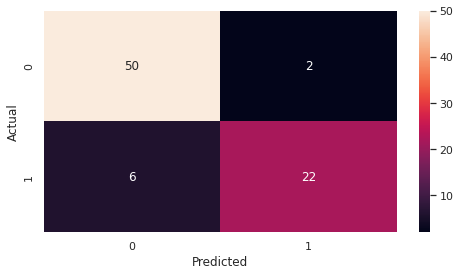

In [ ]:
confusion(y_test,y_pred_1)

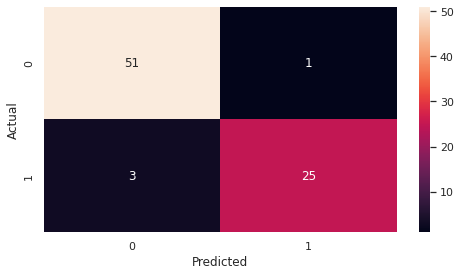

In [ ]:
confusion(y_test,y_pred_2)

## Assignment

dataset link - https://www.kaggle.com/datasets/uciml/iris

Metrics to be used F1 score

<img width = 700 src = https://www.embedded-robotics.com/wp-content/uploads/2022/01/Iris-Dataset-Classification.png />